# 1 数学基础
author：SheltonXiao

## 1.1 绘制函数图像

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
from tqdm import trange

In [9]:
def plotpic_save(a,b):
    x1 = np.arange(-5,5,0.01)[np.newaxis,:]
    x2 = np.arange(-5,5,0.01)[:,np.newaxis]
    z = (a-x1)**2+b*(x2-x1**2)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1,x2,z,cmap='rainbow',alpha=0.7)
    
    plt.savefig("pic/"+str(a)+"_"+str(b)+".png")
    plt.close()

In [11]:
A = np.arange(-1000,1000,100)
B = np.arange(-1000,1000,100)
i,j = np.meshgrid(A,B)
i = i.flatten()
j = j.flatten()
for u in trange(len(i)):
    plotpic_save(i[u],j[u])

100%|██████████| 400/400 [02:13<00:00,  3.01it/s]


可以看pic文件夹，可以分为9类

   
|取值| $b\in (-\infty,0)$ | $b = 0$ |  $b \in (0,\infty)$|        
|---|:---:|:---:|:---:|      
| $a\in (-\infty,0)$|![jupyter](./pic/-100_-100.png)|![jupyter](./pic/-100_0.png)|![jupyter](./pic/-100_100.png)|    
| $a = 0$|![jupyter](./pic/0_-100.png)|![jupyter](./pic/0_0.png)|![jupyter](./pic/0_100.png)|   
| $a\in (0,\infty)$|![jupyter](./pic/100_-100.png)|![jupyter](./pic/100_0.png)|![jupyter](./pic/100_100.png)|   


## 1.2 求最优解

In [95]:
def plotpic(a,b,W):
    up = W.max() + 1.5*(W.max()-W.min())
    down = W.min() - 1.5*(W.max()-W.min())
    x1 = np.arange(down,up,0.01)[np.newaxis,:]
    x2 = np.arange(down,up,0.01)[:,np.newaxis]
    z = (a-x1)**2+b*(x2-x1**2)**2
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1,x2,z,cmap='rainbow',alpha=0.4)
    
    Z = (a-W[0])**2+b*(W[1]-W[0]**2)**2
    ax.plot3D(W[0,-1],W[1,-1],Z[-1],"o")
    
    [x,y] = np.meshgrid(x1[:],x2[:])
    fig2 = plt.figure()
    plt.contour(x,y,z,40)
    plt.plot(W[0],W[1],".-.")
    plt.plot(W[0,-1],W[1,-1],"*")

In [67]:
a = 3
b = 100

In [13]:
def rosenbrock(x):
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

常用的函数

In [18]:
def diff(f, x, delta=1e-4):
    out = []
    out.append((f([x[0]+delta,x[1]]) - f([x[0]-delta,x[1]])) / (2 * delta))
    out.append((f([x[0],x[1]+delta]) - f([x[0],x[1]-delta])) / (2 * delta))
    return out

In [108]:
x = np.array([-1,5])
diff(rosenbrock,x)

[1591.9999959987763, 799.9999999981355]

直接写出导数

In [23]:
def jacobian(x):
    return np.array([-4*b*x[0]*(x[1]-x[0]**2)-2*(a-x[0]),2*b*(x[1]-x[0]**2)])

In [107]:
jacobian(x)

array([1592,  800])

### 1.2.1 最速下降法

先定义搜索函数，根据goldstein准则

In [26]:
import random
 
def goldsteinsearch(f,df,d,x,alpham,rho,t): 
    flag=0
 
    a=0
    b=alpham
    fk=f(x)
    gk=df(x)
 
    phi0=fk
    dphi0=np.dot(gk,d)
 
    alpha=b*random.uniform(0,1)
 
    while(flag==0):
        newfk=f(x+alpha*d)
        phi=newfk
        if(phi-phi0<=rho*alpha*dphi0):
            if(phi-phi0>=(1-rho)*alpha*dphi0):
                flag=1
            else:
                a=alpha
                b=b
                if(b<alpham):
                    alpha=(a+b)/2
                else:
                    alpha=t*alpha
        else:
            a=a
            b=alpha
            alpha=(a+b)/2
    return alpha

主函数

In [88]:
def steepest(x0): 
    imax = 500000
    W=np.zeros((2,imax))
    W[:,0] = x0
    x = x0
    grad = jacobian(x)
    delta = sum(grad**2) # initial error
 
 
    for i in trange(1,imax):
        p = -jacobian(x)
        alpha = goldsteinsearch(rosenbrock,jacobian,p,x,1,0.1,2)
        x = x + alpha*p
        W[:,i] = x
        grad = jacobian(x)
        delta = sum(grad**2)
        if delta<=10**(-5):
            break
 

    W=W[:,0:i+1] # 记录迭代点
    return W

In [109]:
W = steepest(x)

  9%|▉         | 44572/499999 [00:02<00:25, 17943.73it/s]


In [110]:
W[:,-1]

array([2.99052011, 8.94319515])

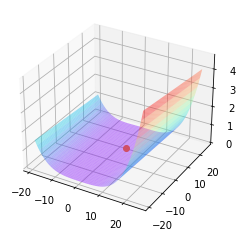

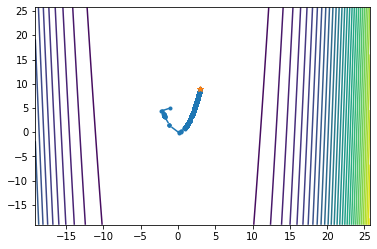

In [111]:
plotpic(a,b,W)

### 1.2.2 梯度下降法

In [120]:
def gradient_decent(x0,lr): 
    imax = 500000
    W=np.zeros((2,imax))
    W[:,0] = x0
    x = x0
    grad = jacobian(x)
    delta = (grad**2).sum() # initial error
 
    for i in trange(1,imax):
        p = -jacobian(x)
        x = x + lr*p
        W[:,i] = x
        grad = jacobian(x)
        delta = (grad**2).sum()
        if delta<=10**(-5):
            break
 
    W=W[:,0:i+1] # 记录迭代点
    return W

In [121]:
lr = 0.001
W = gradient_decent(x,lr)

100%|██████████| 499999/499999 [00:08<00:00, 62292.37it/s]


In [113]:
W[:,-1]

array([1.45179192, 2.26581364])

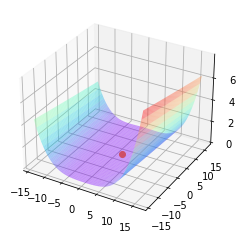

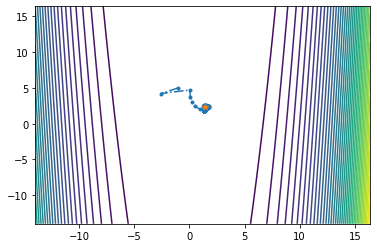

In [114]:
plotpic(a,b,W)

可以看到到后面学得很慢

In [122]:
lr = 0.0015
W = gradient_decent(x,lr)

  0%|          | 0/499999 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
100%|██████████| 499999/499999 [00:07<00:00, 63058.44it/s]


In [116]:
W[:,-1]

array([nan, nan])

暂时还没有解决该问题

### 1.2.3 牛顿迭代法

In [ ]:
def snt(x0): 
    imax = 500000
    W=np.zeros((2,imax))
    W[:,0] = x0
    x = x0
    grad = jacobian(x)
    delta = (grad**2).sum() # initial error
 
    for i in trange(1,imax):
        p = -jacobian(x)
        x = x + lr*p
        W[:,i] = x
        grad = jacobian(x)
        delta = (grad**2).sum()
        if delta<=10**(-5):
            break
 
    W=W[:,0:i+1] # 记录迭代点
    return W